## MLP

In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

width = 28
height = 28

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

In [3]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [4]:
# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 152us/step - loss: 0.2921 - acc: 0.8873 - val_loss: 0.1514 - val_acc: 0.9470
Epoch 2/30
50000/50000 [==============================] - 8s 152us/step - loss: 0.1261 - acc: 0.9551 - val_loss: 0.1032 - val_acc: 0.9657
Epoch 3/30
50000/50000 [==============================] - 7s 137us/step - loss: 0.0887 - acc: 0.9683 - val_loss: 0.0802 - val_acc: 0.9745
Epoch 4/30
50000/50000 [==============================] - 7s 140us/step - loss: 0.0700 - acc: 0.9759 - val_loss: 0.0729 - val_acc: 0.9754
Epoch 5/30
50000/50000 [==============================] - 7s 131us/step - loss: 0.0585 - acc: 0.9805 - val_loss: 0.0859 - val_acc: 0.9706
Epoch 6/30
50000/50000 [==============================] - 8s 168us/step - loss: 0.0503 - acc: 0.9831 - val_loss: 0.0618 - val_acc: 0.9795
Epoch 7/30
50000/50000 [==============================] - 7s 137us/step - loss: 0.0434 - acc: 0.9853 - val_loss: 0.0621 - 

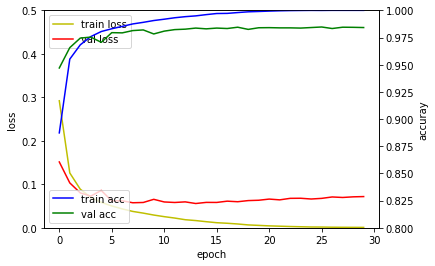

In [5]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [6]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)


10000/10000 [==============================] - 0s 43us/step
## evaluation loss and_metrics ##
[0.057822762054978605, 0.9855]


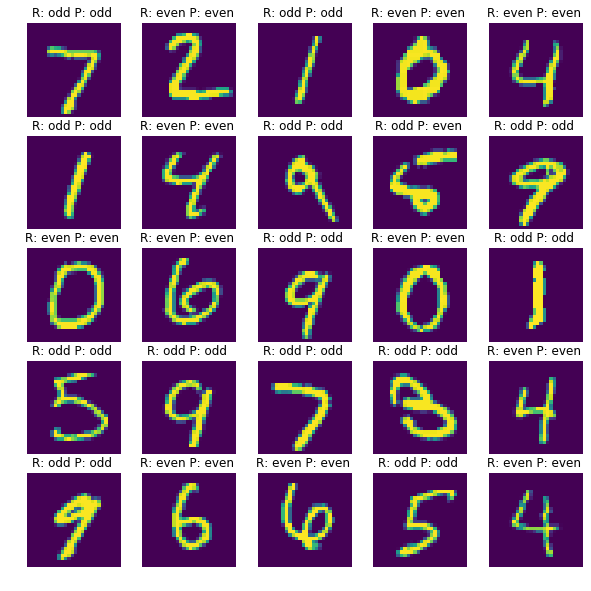

In [9]:
# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    a = int(i/plt_row)
    b = int(i%plt_col)
    sub_plt = axarr[a,b]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()



## CNN

In [10]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

width = 28
height = 28

In [11]:
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

In [12]:
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 27s 532us/step - loss: 0.3214 - acc: 0.8690 - val_loss: 0.1983 - val_acc: 0.9193
Epoch 2/30
50000/50000 [==============================] - 26s 522us/step - loss: 0.1237 - acc: 0.9553 - val_loss: 0.1026 - val_acc: 0.9648
Epoch 3/30
50000/50000 [==============================] - 27s 533us/step - loss: 0.0825 - acc: 0.9708 - val_loss: 0.0959 - val_acc: 0.9676
Epoch 4/30
50000/50000 [==============================] - 27s 539us/step - loss: 0.0660 - acc: 0.9768 - val_loss: 0.0530 - val_acc: 0.9814
Epoch 5/30
50000/50000 [==============================] - 29s 570us/step - loss: 0.0565 - acc: 0.9798 - val_loss: 0.0531 - val_acc: 0.9806
Epoch 6/30
50000/50000 [==============================] - 31s 611us/step - loss: 0.0498 - acc: 0.9823 - val_loss: 0.0458 - val_acc: 0.9850
Epoch 7/30
50000/50000 [==============================] - 28s 568us/step - loss: 0.0451 - acc: 0.9840 - val_loss: 0.

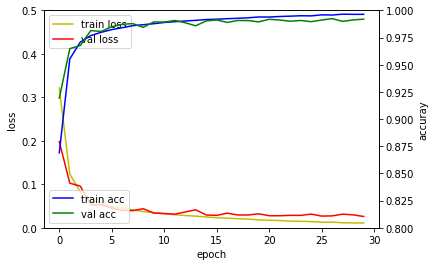

In [14]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [15]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 2s 171us/step
## evaluation loss and_metrics ##
[0.020286884236190236, 0.9935]


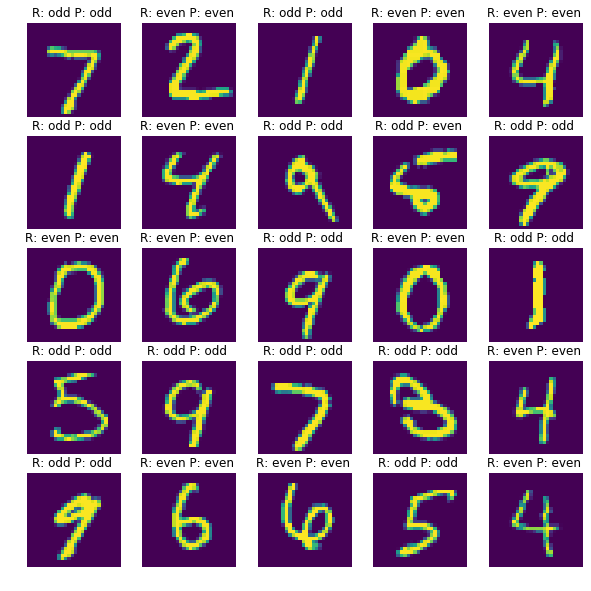

In [17]:
# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    a = int(i/plt_row)
    b = int(i%plt_col)
    sub_plt = axarr[a,b]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()



## DEEP CNN

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 92s 2ms/step - loss: 0.3837 - acc: 0.8243 - val_loss: 0.1717 - val_acc: 0.9391
Epoch 2/30
50000/50000 [==============================] - 92s 2ms/step - loss: 0.1722 - acc: 0.9355 - val_loss: 0.0810 - val_acc: 0.9726
Epoch 3/30
50000/50000 [==============================] - 93s 2ms/step - loss: 0.1134 - acc: 0.9597 - val_loss: 0.0570 - val_acc: 0.9811
Epoch 4/30
50000/50000 [==============================] - 94s 2ms/step - loss: 0.0872 - acc: 0.9684 - val_loss: 0.0480 - val_acc: 0.9829
Epoch 5/30
50000/50000 [==============================] - 93s 2ms/step - loss: 0.0746 - acc: 0.9740 - val_loss: 0.0427 - val_acc: 0.9850
Epoch 6/30
50000/50000 [==============================] - 82s 2ms/step - loss: 0.0648 - acc: 0.9777 - val_loss: 0.0391 - val_acc: 0.9870
Epoch 7/30
50000/50000 [==============================] - 83s 2ms/step - loss: 0.0592 - acc: 0.9789 - val_loss: 0.0357 - val_acc

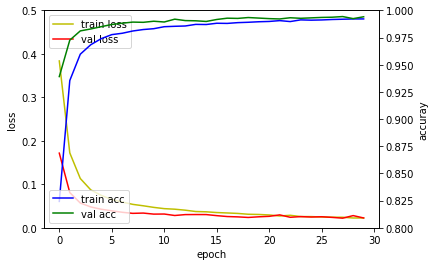

10000/10000 [==============================] - 3s 348us/step
## evaluation loss and_metrics ##
[0.014425241368329443, 0.9952]


In [19]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout

width = 28
height = 28
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)



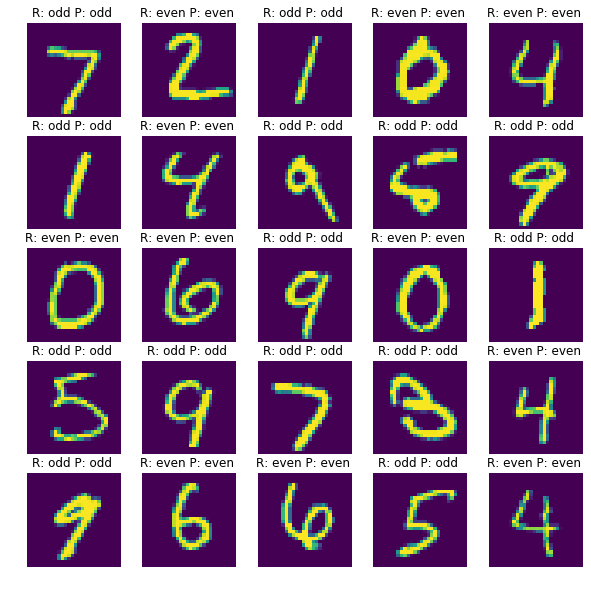

In [20]:
# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    a = int(i/plt_row)
    b = int(i%plt_col)
    sub_plt = axarr[a,b]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()

